### Εργασία 3

#### Αναγνώριση Προτύπων

##### Κωτούλας Εμμανουήλ 9697

Αρχικά εισάγουμε τις απαραίτητες βιβλιοθήκες της python ώστε να χρησιμοποιήσουμε τον tree classifier και το iris dataset

In [249]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
from collections import Counter

In [250]:
iris = load_iris()

X = iris.data[:, :2]  # διαβάζουμε μόνο τα πρώτα δύο στοιχεία
y = iris.target


Xtrain = np.vstack((X[:25],X[50:75],X[100:125]))
Ytrain = np.hstack((y[:25],y[50:75],y[100:125]))


Xtest = np.vstack((X[25:50],X[75:100],X[125:150]))
Ytest = np.hstack((y[25:50],y[75:100],y[125:150]))


## Μέρος Α

In [251]:
bestDepth = 1
bestAccuracy = 0

for i in range(1,15):
    clf = DecisionTreeClassifier(max_depth=i)

    clf.fit(Xtrain,Ytrain)

    Ypred = clf.predict(Xtest)

    accu = accuracy_score(Ytest, Ypred)

    if accu > bestAccuracy :
        bestAccuracy = accu
        bestDepth = i

    print(i, accu, bestAccuracy)

print("Best accuracy = " + str(bestAccuracy) + " at depth " + str(bestDepth))



1 0.64 0.64
2 0.68 0.68
3 0.6933333333333334 0.6933333333333334
4 0.8 0.8
5 0.7866666666666666 0.8
6 0.7866666666666666 0.8
7 0.68 0.8
8 0.6933333333333334 0.8
9 0.6666666666666666 0.8
10 0.72 0.8
11 0.7066666666666667 0.8
12 0.7066666666666667 0.8
13 0.72 0.8
14 0.72 0.8
Best accuracy = 0.8 at depth 4


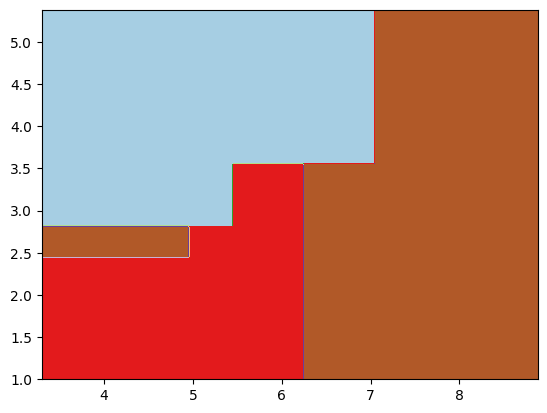

In [252]:
clf = DecisionTreeClassifier(max_depth=bestDepth)
clf.fit(Xtrain,Ytrain)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

## Μέρος Β

In [253]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]


def bootstrappedTree(X, y, Xtest ,depth, percentage):
    y_preds = []
    for i in range(100):
        x_sampled, y_sampled = resample( X, y, n_samples = int(len(X)*percentage) )
        clf = DecisionTreeClassifier(max_depth= depth)
        clf.fit(x_sampled, y_sampled)

        if i == 0 :
            y_preds =  clf.predict(Xtest)
        else:
            y_preds = np.vstack(( y_preds, clf.predict(Xtest)))

    y_finalPred = []

    y_preds = np.swapaxes(y_preds,0,1)

    for i in range(len(Xtest)):
        y_finalPred.append(most_frequent(y_preds[i]))

    return y_finalPred


bestDepthBoot = 1
bestAccuracy = 0

for i in range(1,20):
    y_preds = bootstrappedTree(Xtrain, Ytrain, Xtest, i, 0.5)
    accuBoot = accuracy_score(Ytest, y_preds)
    if accuBoot > bestAccuracy :
        bestAccuracy = accuBoot
        bestDepthBoot = i
    print(accuBoot,i)


print("best accuracy = " + str(bestAccuracy) + " at depth " + str(bestDepthBoot))


0.7333333333333333 1
0.7466666666666667 2
0.76 3
0.72 4
0.72 5
0.7733333333333333 6
0.7466666666666667 7
0.6666666666666666 8
0.7333333333333333 9
0.7733333333333333 10
0.72 11
0.7333333333333333 12
0.7466666666666667 13
0.7733333333333333 14
0.72 15
0.76 16
0.7066666666666667 17
0.72 18
0.72 19
best accuracy = 0.7733333333333333 at depth 6


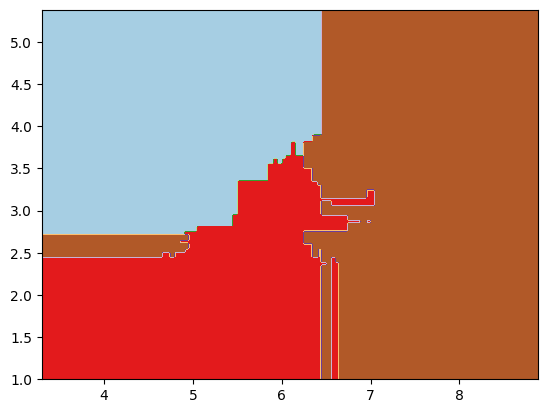

In [254]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

Z = bootstrappedTree(Xtrain, Ytrain, np.c_[xx.ravel(), yy.ravel()], bestDepthBoot, 0.5 )
Z = np.reshape(Z,xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)